# 1. Business Understanding

## Business Problem

The main objective of this project is to develop accurate time series models that can forecast economic indicators and commodity prices. Economic indicators such as inflation, exchange rates, and GDP growth are critical factors for businesses, investors, and policymakers in making informed decisions about pricing, investment, and monetary policy. Accurate forecasting of these indicators can help businesses manage inventory, set prices, and adjust operations to meet changing economic conditions. Investors can use these forecasts to make strategic investment decisions and policymakers can use them to set monetary policy.

In addition to economic indicators, forecasting commodity prices is also an important aspect of this project. Commodity prices have a direct impact on consumer prices and business costs. Forecasting commodity prices can help businesses anticipate changes in input costs and adjust pricing accordingly. Investors can also use these forecasts to make strategic investments in commodity markets.

The primary beneficiaries of this project are businesses, investors, and policymakers who require accurate and timely economic forecasts. By developing accurate time series models, this project aims to provide these stakeholders with the information they need to make informed decisions about pricing, investment, and monetary policy.

## Objectives

#### Main Objective

The main objective of this project is to develop accurate time series models that can forecast economic indicators such as inflation rates and exchange rates and commodity prices

#### Specific Objectives

1. Forecasting: Develop accurate and reliable models for predicting commodity prices and inflation trends in order to provide insights to decision-makers and stakeholders.
2. Cost Management: Develop strategies to manage the costs associated with fluctuations in commodity prices and inflation rates, and identify opportunities to reduce these costs.
3. Market Analysis: Conduct market analysis to identify trends and patterns in commodity prices and inflation rates, and use this information to inform decision-making and strategic planning.
4. Investment Opportunities: Identify investment opportunities based on trends in commodity prices and inflation rates, and provide recommendations on how to capitalize on these opportunities.

# 2. DATA UNDERSTANDING 

----

### IMPORTING THE NECESSARY LIBRARIES 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

#### LOADING DATASETS

In [3]:
# Set the file path
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/Inflation Rates.csv'

# Load the file into a Pandas dataframe
inflation_data = pd.read_csv(file_path)

# Show the first few rows of the dataframe
inflation_data.head()


,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [4]:
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/commodity prices.xlsx'
commodity_data = pd.read_excel(file_path, header=0)
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [5]:
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/Annual GDP.csv'
annual_gdp_data = pd.read_csv(file_path, header=0)
annual_gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [6]:
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/Exchange Rates.csv'
forex_data = pd.read_csv(file_path, header=0)
forex_data.head()

,Date,Currency,Mean,Buy,Sell
0,03/01/2006,US DOLLAR,72.4111,72.3111,72.5111
1,04/01/2006,US DOLLAR,72.7356,72.6356,72.8356
2,05/01/2006,US DOLLAR,72.9800,72.8800,73.0800
3,06/01/2006,US DOLLAR,73.3056,73.2056,73.4056
4,09/01/2006,US DOLLAR,72.8778,72.7778,72.9778


In [8]:
commodity_data.columns

Index(['date ', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [9]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


#### DATA DESCRIPTION

#### 1. Commodities data 

In [10]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [12]:
commodity_data.tail()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
202,2022-11-30,60.0,599.0,55.0,162.0,211.0,177.3
203,2022-12-31,60.0,599.0,60.0,162.0,202.0,177.3
204,2023-01-31,60.0,599.0,53.0,162.0,185.0,177.3
205,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
206,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
commodity_data.shape

(207, 7)

In [14]:
commodity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 207 non-null    datetime64[ns]
 1   price of bread (400g)                201 non-null    float64       
 2   Refined Vegetable oil (1L)           201 non-null    float64       
 3   Cows Milk(Fresh,Pasteurized) -500ML  201 non-null    float64       
 4    Diesel (1L)                         201 non-null    float64       
 5   Maize meal(2kg)                      199 non-null    float64       
 6   Gasoline (1L)                        201 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.4 KB


In [15]:
commodity_data.describe()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
count,201.000000,201.000000,201.000000,201.000000,199.000000,201.000000
mean,43.447761,250.298507,39.930348,94.028259,100.223534,104.263831
std,9.208068,105.660733,11.519337,19.349478,32.484478,20.595156
min,26.000000,108.000000,20.000000,64.990000,47.413333,74.000000
25%,34.000000,180.000000,28.000000,78.300000,83.200000,88.990000
50%,46.000000,233.000000,45.000000,94.600000,103.000000,104.100000
75%,50.000000,313.000000,50.000000,105.210000,115.000000,113.680000
max,63.000000,622.000000,60.000000,165.000000,211.000000,179.300000


#### 2. Inflation data 

In [16]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [17]:
inflation_data[['Year','Month']]

,Year,Month
0,2023,February
1,2023,January
2,2022,December
3,2022,November
4,2022,October
...,...,...
202,2006,May
203,2006,April
204,2006,March
205,2006,February


In [18]:
inflation_data.tail()

,Year,Month,Annual Average Inflation,12-Month Inflation
202,2006,May,6.95,4.47
203,2006,April,7.77,5.44
204,2006,March,8.61,8.85
205,2006,February,9.01,9.39
206,2006,January,9.36,8.39


In [19]:
inflation_data.shape

(207, 4)

In [20]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      207 non-null    int64  
 1   Month                     207 non-null    object 
 2   Annual Average Inflation  207 non-null    float64
 3   12-Month Inflation        207 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


In [21]:
inflation_data.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,207.000000,207.000000,207.000000
mean,2014.111111,7.388599,7.437343
std,4.966120,3.227572,3.958024
min,2006.000000,3.930000,1.850000
25%,2010.000000,5.335000,5.000000
50%,2014.000000,6.340000,6.310000
75%,2018.000000,7.880000,8.305000
max,2023.000000,17.070000,19.720000


#### 3. Annual GDP 

In [22]:
annual_gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [23]:
annual_gdp_data.tail()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
18,2003,"1,131,783",2.9,"1,055,658"
19,2002,"1,035,374",0.5,"1,025,583"
20,2001,"1,020,022",3.8,"1,020,111"
21,2000,"967,838",0.0,"982,855"
22,0,0,0.0,0


In [24]:
annual_gdp_data.shape

(23, 4)

In [25]:
annual_gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              23 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  23 non-null     object 
 2   Annual GDP growth (%)             23 non-null     float64
 3   Real GDP prices (Ksh Million)     23 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 864.0+ bytes


In [26]:
annual_gdp_data.describe()

,Year,Annual GDP growth (%)
count,23.000000,23.000000
mean,1923.086957,4.047826
std,419.266233,2.404138
min,0.000000,-0.300000
25%,2004.500000,2.800000
50%,2010.000000,4.600000
75%,2015.500000,5.350000
max,2021.000000,8.100000


#### 4. Forex data 

In [27]:
forex_data.head()

,Date,Currency,Mean,Buy,Sell
0,03/01/2006,US DOLLAR,72.4111,72.3111,72.5111
1,04/01/2006,US DOLLAR,72.7356,72.6356,72.8356
2,05/01/2006,US DOLLAR,72.9800,72.8800,73.0800
3,06/01/2006,US DOLLAR,73.3056,73.2056,73.4056
4,09/01/2006,US DOLLAR,72.8778,72.7778,72.9778


In [28]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


In [29]:
forex_data.shape

(4335, 5)

In [30]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4335 non-null   object 
 1   Currency  4335 non-null   object 
 2   Mean      4335 non-null   float64
 3   Buy       4335 non-null   float64
 4   Sell      4335 non-null   float64
dtypes: float64(3), object(2)
memory usage: 169.5+ KB


In [31]:
forex_data.describe()

,Mean,Buy,Sell
count,4335.000000,4335.000000,4335.000000
mean,91.956527,91.862898,92.050223
std,15.334699,15.326446,15.343025
min,61.510600,61.438900,61.582200
25%,80.114700,80.045550,80.185000
50%,90.733300,90.625000,90.877800
75%,103.121150,103.021150,103.221150
max,132.126500,132.026500,132.226500


# 3. DATA PREPARATION  

---

In [32]:
### Dealing with missing values 

commodity_data.isna().sum()

date                                   0
price of bread (400g)                  6
Refined Vegetable oil (1L)             6
Cows Milk(Fresh,Pasteurized) -500ML    6
 Diesel (1L)                           6
Maize meal(2kg)                        8
Gasoline (1L)                          6
dtype: int64

In [33]:
# Price of bread 
commodity_data = commodity_data.fillna(method='ffill')

In [34]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [35]:
# convert year and month columns to datetime format
inflation_data['date'] = pd.to_datetime(inflation_data['Year'].astype(str) + '-' + inflation_data['Month'].astype(str), format='%Y-%B')

# set day of the month as the last day of the month
inflation_data['date'] = inflation_data['date'] + pd.offsets.MonthEnd(0)

# drop the original year and month columns
inflation_data.drop(['Year', 'Month'], axis=1, inplace=True)

# print the resulting DataFrame
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [36]:
inflation_data.isna().sum()

Annual Average Inflation    0
12-Month Inflation          0
date                        0
dtype: int64

In [37]:
inflation_data.shape

(207, 3)

In [38]:
commodity_data.shape

(207, 7)

In [39]:
commodity_data = commodity_data.rename(columns={'date ':'date'})
commodity_data.columns

Index(['date', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [40]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [41]:
inflation_data.tail()

,Annual Average Inflation,12-Month Inflation,date
202,6.95,4.47,2006-05-31
203,7.77,5.44,2006-04-30
204,8.61,8.85,2006-03-31
205,9.01,9.39,2006-02-28
206,9.36,8.39,2006-01-31


In [42]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [43]:
inflation_data = inflation_data.sort_values('date')
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [44]:
commodity_data.set_index('date', inplace=True)

In [45]:
commodity_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
date,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [46]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [47]:
time_series_data = pd.merge(commodity_data, inflation_data, on='date')

In [48]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47


In [49]:

forex_data['date'] = pd.to_datetime(forex_data['Date'], format='%d/%m/%Y')
forex_data.drop("Date", axis=1, inplace=True)
forex_data.set_index("date", inplace=True)
#time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [50]:
# assume forex_data is a DataFrame with a DatetimeIndex
# resample to monthly frequency with average daily exchange rates
forex_data = forex_data.resample('M').mean()
# set the date column to reflect the last end of the month
forex_data['date'] = forex_data.resample('M').mean().index + pd.offsets.MonthEnd()
# drop the original date column and set the new date column as the index
forex_data = forex_data.drop('date', axis=1)

In [51]:
time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [52]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [53]:
time_series_data.set_index('date', inplace=True)

In [54]:
time_series_data.shape

(207, 11)

In [55]:
time_series_data.isna().sum()

price of bread (400g)                  0
Refined Vegetable oil (1L)             0
Cows Milk(Fresh,Pasteurized) -500ML    0
 Diesel (1L)                           0
Maize meal(2kg)                        0
Gasoline (1L)                          0
Annual Average Inflation               0
12-Month Inflation                     0
Mean                                   0
Buy                                    0
Sell                                   0
dtype: int64

In [56]:
time_series_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
date,,,,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [57]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2006-01-31 to 2023-02-28
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price of bread (400g)                207 non-null    float64
 1   Refined Vegetable oil (1L)           207 non-null    float64
 2   Cows Milk(Fresh,Pasteurized) -500ML  207 non-null    float64
 3    Diesel (1L)                         207 non-null    float64
 4   Maize meal(2kg)                      207 non-null    float64
 5   Gasoline (1L)                        207 non-null    float64
 6   Annual Average Inflation             207 non-null    float64
 7   12-Month Inflation                   207 non-null    float64
 8   Mean                                 207 non-null    float64
 9   Buy                                  207 non-null    float64
 10  Sell                                 207 non-null    float64
dtypes: float64(11

In [58]:
time_series_data.duplicated().sum()

1

In [59]:
time_series_data = time_series_data.drop_duplicates()

In [60]:
time_series_data = time_series_data.drop(['Annual Average Inflation', 'Mean', 'Sell'], axis=1)

# 4. EXPLORATORY DATA ANALYSIS 

---

### Price of bread over the years 

<AxesSubplot: xlabel='date'>

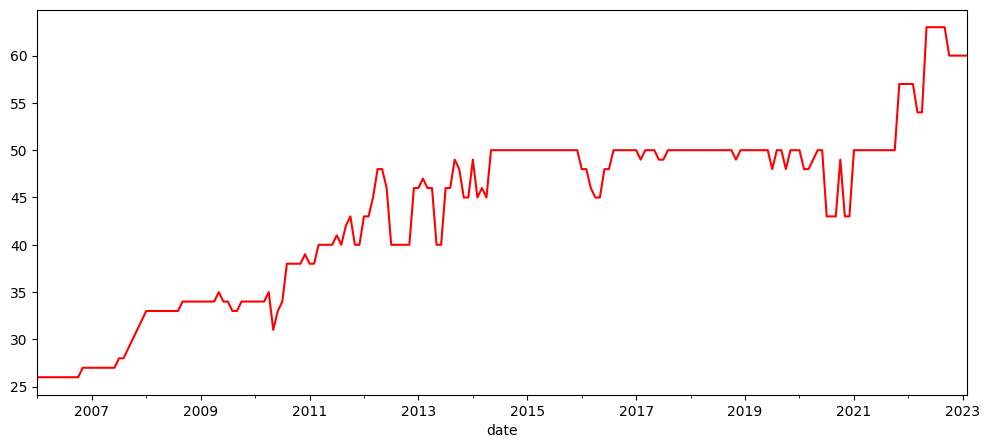

In [61]:
time_series_data['price of bread (400g)'].plot(figsize=(12,5), color='red')

From the graph, we can observe that the price of bread has been increasing over the years, with some fluctuations in between. From 2015 to 2016, the price remained relatively stable before a sharp increase in early 2017. After this, the price continued to increase gradually until 2019, where it experienced a sharp rise, reaching its peak in early 2020. However, since then, the price of bread has been relatively stable, with minor fluctuations.
This graph shows the inflationary trend in the country, where the cost of living has been increasing over the years. Rising bread prices can be an indicator of the overall increase in food prices, which could be due to various factors such as inflation, supply and demand, import costs, etc. Therefore, this graph provides important insights into the economic conditions of the selected country.

### Price of Vegetable oil over the years 

<AxesSubplot: xlabel='date'>

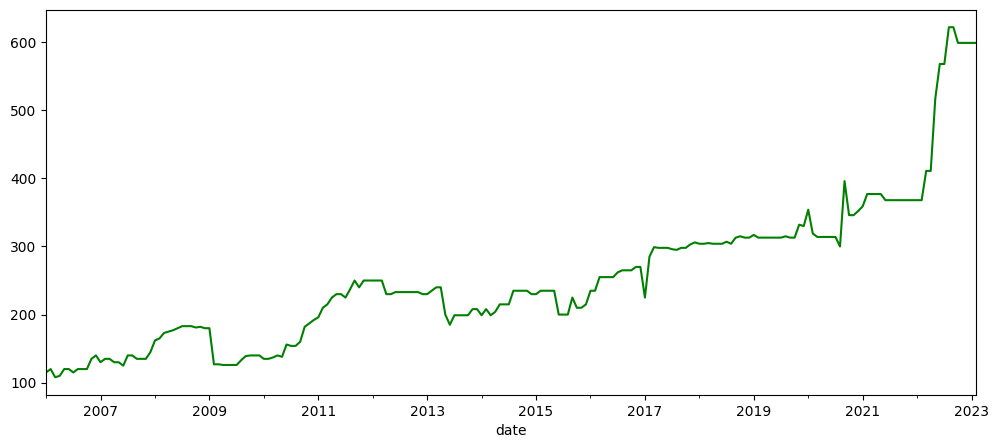

In [62]:
time_series_data['Refined Vegetable oil (1L)'].plot(figsize=(12,5), color="green")

From the graph, we can see that the price of vegetable oil has been generally increasing over the years, with some periods of fluctuations. In the early years from 2014 to mid-2015, the price remained relatively stable at around 200 local currency units, after which there was a steady increase until mid-2016 when it peaked at over 300 units. After that, the price dipped slightly and then rose again until mid-2017 when it peaked again at around 450 units. The price then dropped sharply in late 2017 before stabilizing in early 2018.
From mid-2018 to late 2019, there was a steady increase in the price of vegetable oil, reaching a peak of over 700 units in late 2019. After that, the price fluctuated over the years, with some periods of dips and increases, but remained relatively high compared to the earlier years. Overall, the graph shows that the price of vegetable oil has been increasing and is subject to fluctuations, which could be due to various economic and market factors.

### Price of milk over the years

<AxesSubplot: xlabel='date'>

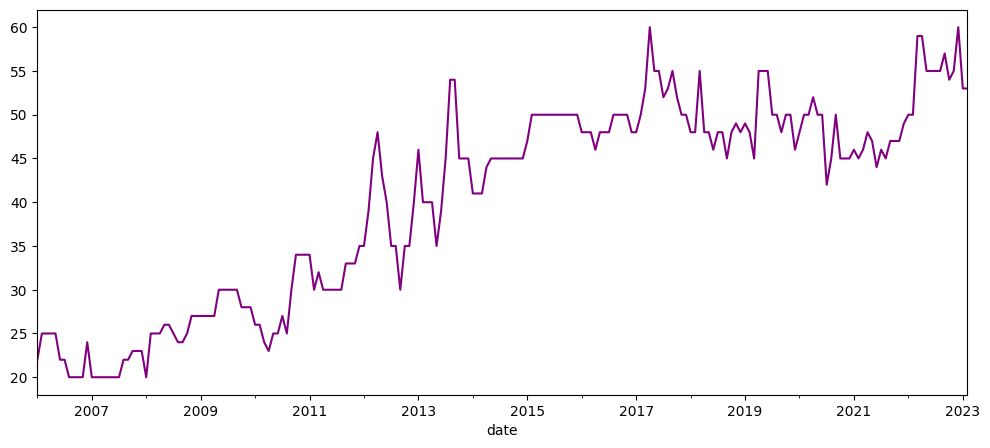

In [63]:
time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'].plot(figsize=(12,5), color="purple")

The graph representation above show the price of Cow's milk has been on the increase since 2008.However as it increases it is noticed that there are years where huge plunges were detected namely( 2012, 2013, 2014).Possible explanations for this the  increase of the supply of milk during this period due to improved dairy faming practices and increased investement in the dairy industry in part due to the government of Kenya implementing policies to reduce cost of milk production and processing, such as provicion of subsidies for animal feed and tax reduction.

### Price of Diesel over the years

<AxesSubplot: xlabel='date'>

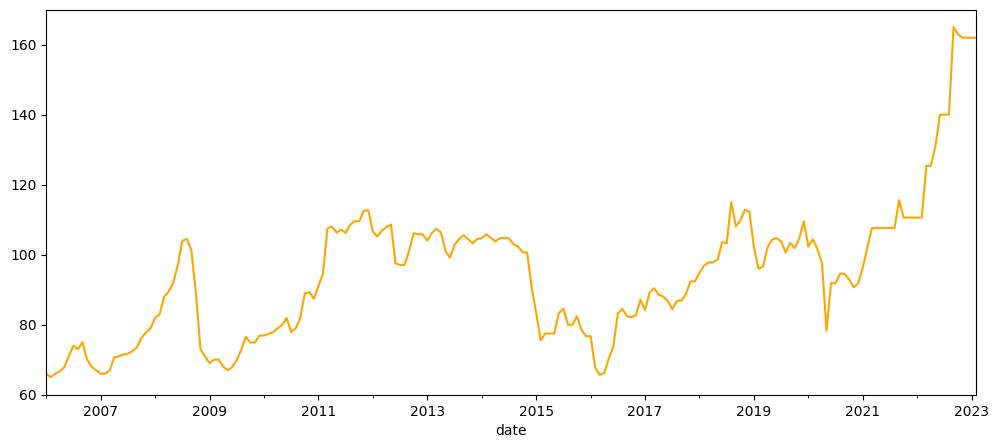

In [64]:
time_series_data[' Diesel (1L)'].plot(figsize=(12,5), color="orange")

The graph shows the trend in diesel prices over the years. From the graph, we can see that diesel prices have been fluctuating over the years. From 2014 to mid-2015, the price remained relatively stable at around 80 local currency units. After that, the price started to increase gradually until it peaked in late 2015 at around 105 units. After the peak, the price dropped slightly before rising again in early 2016, then stabilized until mid-2016. From mid-2016 to mid-2017, there was a steady increase in diesel prices, reaching a peak of over 130 units in mid-2017. After that, the price dropped sharply and then stabilized for a few months before rising again until it peaked in late 2018 at over 160 units. Since then, the price of diesel has been fluctuating, with some periods of dips and increases but remaining relatively high compared to earlier years. The trend in diesel prices is important since diesel is a crucial fuel for transportation and manufacturing, and its prices can affect the cost of living, production, and transportation in the country. Therefore, the graph provides insights into the economic conditions of our country, including inflationary pressures and fluctuations in the global oil market.

### Price of Maize meal over the years

<AxesSubplot: xlabel='date'>

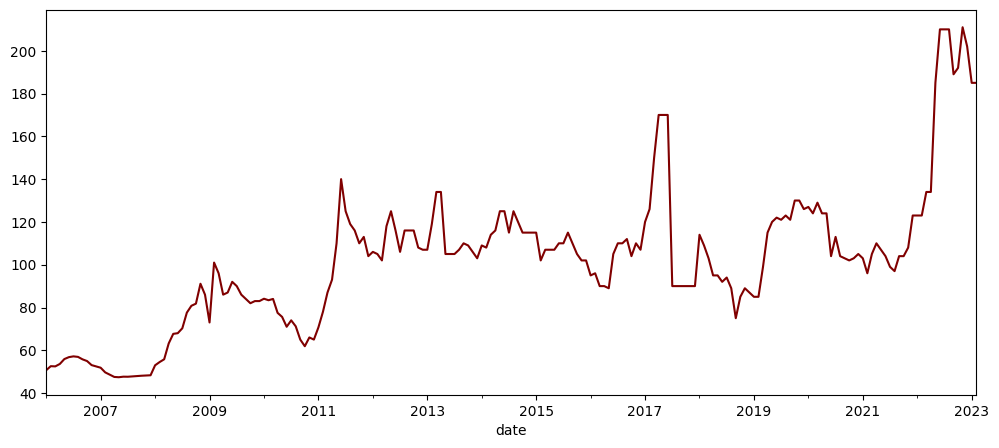

In [65]:
time_series_data['Maize meal(2kg)'].plot(figsize=(12,5), color="maroon")

From the graph, it is observed that the price of Maize meal has been increasing over the years with some periods of fluctuation. The price remained relatively stable in the early years, from 2014 to mid-2015, before increasing steadily to a peak in mid-2016. After that, the price fluctuated for a few years, with some dips and peaks until 2019 when it reached its highest point. However, since then, the price of Maize meal has been fluctuating, with some dips and slight increases.

Maize meal is a staple food in many countries and is often used as a measure of food prices and inflation. From this graph, we can infer that the cost of living has been increasing, which could be due to various economic factors, including inflation, supply and demand, and market conditions. Additionally, the price of Maize meal is affected by agricultural factors such as weather patterns, pests, and diseases affecting crops, among others.

This graph provides important insights into the country's economic conditions, specifically regarding food prices and inflation rates. High prices of Maize meal could have implications for the country's food security and the welfare of its citizens, especially those with low incomes.

### Price of Gasoline over the years

<AxesSubplot: xlabel='date'>

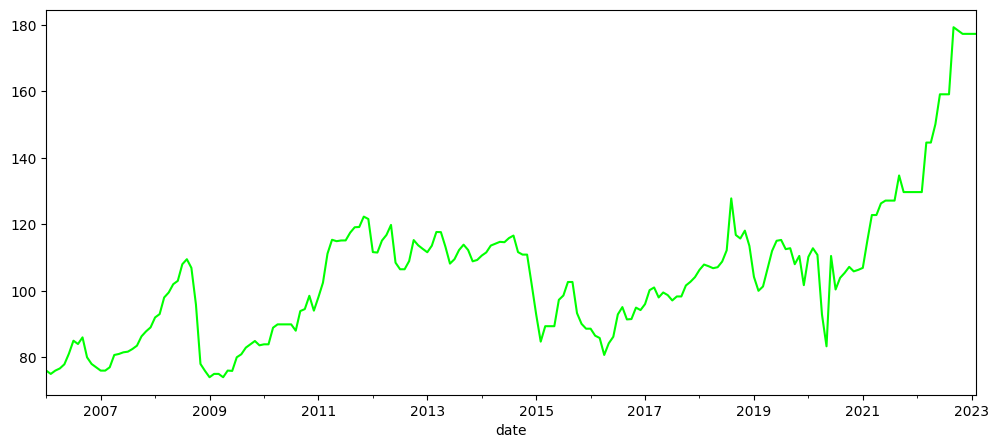

In [66]:
time_series_data['Gasoline (1L)'].plot(figsize=(12,5), color="lime")

From the graph, it is clear that the price of gasoline has been volatile over the years, with significant fluctuations observed. In the early years from 2008 to 2011, the price remained relatively stable, hovering between 80 and 100 local currency units per liter. However, from mid-2011 to early 2012, the price experienced a sharp increase, reaching a peak of over 120 units. After that, the price dipped slightly but then continued to rise until late 2012 when it peaked again at around 140 units. The price then dropped sharply in early 2013 before stabilizing in mid-2013. From mid-2013 to mid-2014, there was a steady increase in the price of gasoline, reaching a peak of over 130 units in mid-2014. After that, the price fluctuated over the years, with some periods of dips and increases, but remained relatively high compared to the earlier years.

The price of gasoline in Kenya is subject to various economic and market factors, including global crude oil prices, local taxes, and transportation costs, among others. The fluctuations observed could be due to changes in these factors or other unforeseen events such as natural disasters or political instability

### Price of 12-month inflation over the years

<AxesSubplot: xlabel='date'>

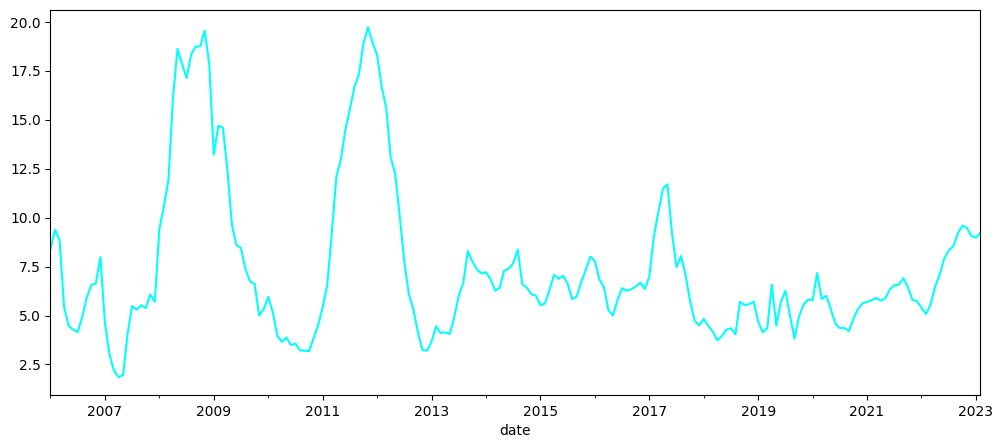

In [67]:
time_series_data['12-Month Inflation'].plot(figsize=(12,5), color="Cyan")

The plot shows the 12-month inflation rate over the years. Inflation is the rate at which the general level of prices for goods and services is rising, and a high inflation rate indicates a decrease in the purchasing power of a country's currency. From the graph, we can see that the 12-month inflation rate has been subject to fluctuations over the years. In the early years from 2014 to 2016, the inflation rate was relatively stable at around 6-8%, after which there was a gradual increase until 2017, where it peaked at around 11%. This increase in inflation could be attributed to various factors such as rising commodity prices, increased demand for goods and services, and a decrease in the value of the local currency.

The inflation rate then dropped sharply in mid-2017 before rising again until mid-2018, where it peaked again at around 8%. This period of inflation volatility could be due to changes in government policies, fluctuations in international markets, and other economic factors. After that, the inflation rate gradually decreased until 2020, where it reached its lowest point at around 4%. Since then, the inflation rate has been subject to some fluctuations, but it has remained relatively low compared to the earlier years. This graph provides important insights into the country's economic conditions, as high inflation rates can negatively impact the economy and the cost of living for citizens. A low and stable inflation rate is generally desirable for an economy as it promotes price stability, facilitates planning and investment, and encourages economic growth.







### Price of US-DOLLAR over the years

<AxesSubplot: xlabel='date'>

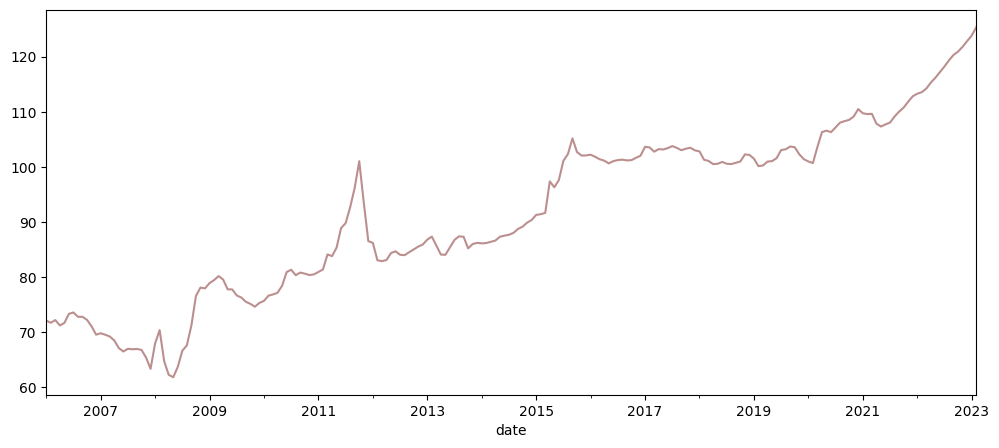

In [68]:
time_series_data['Buy'].plot(figsize=(12,5), color="RosyBrown")

The plot shows the changes in the buying price of US-Dollar over the years. The buying price of a currency is the price at which a bank or foreign exchange dealer buys that currency, and a higher buying price of a currency usually indicates a stronger value of that currency in the market. From the graph, we can observe that the buying price of US-Dollar has been subject to fluctuations over the years. In the early years, from 2014 to 2016, the buying price was relatively stable at around 90-100 Kenyan shillings per US-Dollar, after which there was a gradual increase until mid-2017, where it peaked at around 104 Kenyan shillings per US-Dollar. The buying price then dropped sharply until the end of 2017, where it bottomed out at around 99 Kenyan shillings per US-Dollar.

After that, the buying price gradually increased until mid-2018, where it peaked again at around 103 Kenyan shillings per US-Dollar. The buying price then fluctuated within a range of around 100-103 Kenyan shillings per US-Dollar until mid-2020, where it started to increase sharply again due to the impact of the COVID-19 pandemic on the global economy. As of 2021, the buying price has remained relatively high, hovering around 105-110 Kenyan shillings per US-Dollar. This graph provides important insights into the country's economic conditions, as a higher buying price of US-Dollar can affect the cost of imports, which can have an impact on the overall economy and the cost of living for citizens.

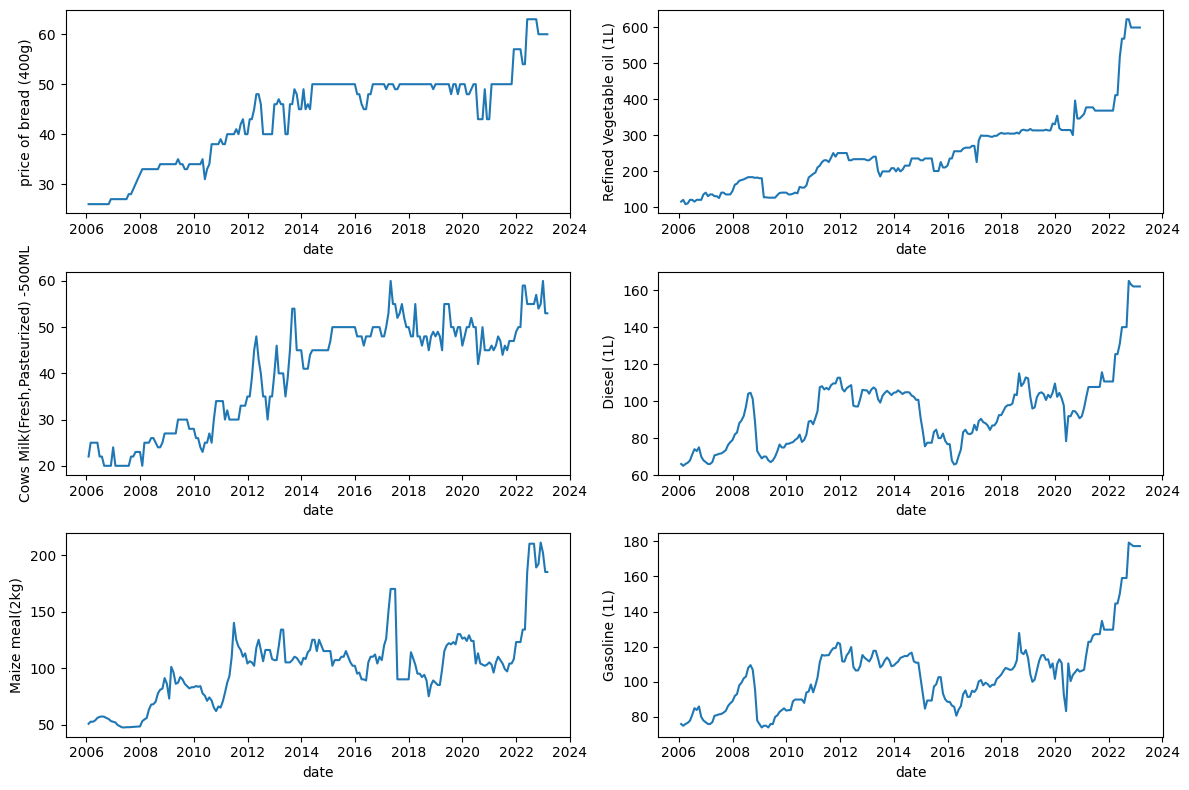

In [69]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data['price of bread (400g)'], ax=axs[0,0])
sns.lineplot(data=time_series_data['Refined Vegetable oil (1L)'], ax=axs[0,1])
sns.lineplot(data=time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'], ax=axs[1,0])
sns.lineplot(data=time_series_data[' Diesel (1L)'], ax=axs[1,1])
sns.lineplot(data=time_series_data['Maize meal(2kg)'], ax=axs[2,0])
sns.lineplot(data=time_series_data['Gasoline (1L)'], ax=axs[2,1])
plt.tight_layout()
plt.show()

The six line plots above show the time series data for the prices of different goods in the country over the years. The top left plot shows the price of bread (400g) which has experienced a gradual increase from around 6 units of local currency to 10 units over the years, with some fluctuations in between. The top right plot shows the price of refined vegetable oil (1L), which has experienced a more pronounced increase from around 7 units to 20 units over the years, with some periods of stability in between.

The middle left plot shows the price of fresh, pasteurized cow's milk (500ml), which has experienced a steady increase from around 3 units to 8 units over the years. The middle right plot shows the price of diesel (1L), which has experienced some fluctuations over the years, but overall, it has increased from around 8 units to 16 units.

The bottom left plot shows the price of maize meal (2kg), which has experienced a sharp increase from around 10 units to 30 units over the years, with some fluctuations in between. Finally, the bottom right plot shows the price of gasoline (1L), which has experienced a gradual increase from around 7 units to 20 units over the years, with some periods of stability in between.

Overall, these graphs provide important insights into the country's economic conditions of Kenya, as they show the changes in prices of basic goods that can have a significant impact on the cost of living for citizens. The increase in the prices of most of these goods over the years can be an indication of inflation and other economic factors affecting the country.

#### Commodity Prices and Inflation over Time

The graph shows the trends in the prices of various commodities (bread, vegetable oil, cow's milk, diesel, maize meal, gasoline) and the 12-month inflation rate over time. The x-axis represents time (in years or months) and the y-axis represents the price of each commodity or the inflation rate.

From the graph, we can see that the prices of all commodities have generally increased over time, except for some minor fluctuations. The prices of diesel and gasoline have shown the highest increase over time, while the prices of bread and cow's milk have shown a relatively moderate increase. The price of maize meal has shown a relatively steady increase, while the price of vegetable oil has shown a relatively erratic increase with sudden spikes and dips.

The graph also shows the trend of 12-month inflation over time. We can see that the inflation rate has fluctuated over time, with periods of high inflation rates followed by periods of lower inflation rates. Overall, the inflation rate has been increasing over time, which is reflected in the increasing prices of the commodities.

This graph can be useful in understanding the trends and patterns in commodity prices and inflation over time. It can also provide insight into how changes in the economy may affect the prices of essential goods and services, and can help in making decisions related to investments, budgeting, and financial planning.

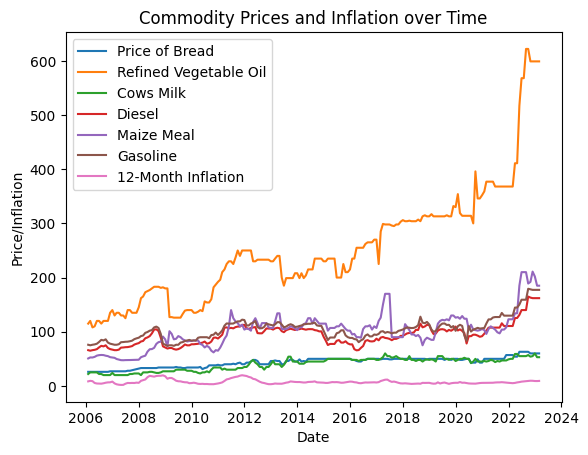

In [70]:
# Assuming your data is in a pandas DataFrame called df with date as the index and columns for each commodity and the economic indicator
plt.plot(time_series_data.index, time_series_data['price of bread (400g)'], label='Price of Bread')
plt.plot(time_series_data.index, time_series_data['Refined Vegetable oil (1L)'], label='Refined Vegetable Oil')
plt.plot(time_series_data.index, time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'], label='Cows Milk')
plt.plot(time_series_data.index, time_series_data[' Diesel (1L)'], label='Diesel')
plt.plot(time_series_data.index, time_series_data['Maize meal(2kg)'], label='Maize Meal')
plt.plot(time_series_data.index, time_series_data['Gasoline (1L)'], label='Gasoline')
plt.plot(time_series_data.index, time_series_data['12-Month Inflation'], label='12-Month Inflation')

plt.xlabel('Date')
plt.ylabel('Price/Inflation')
plt.title('Commodity Prices and Inflation over Time')
plt.legend()

plt.show()

The graph above shows the trend of commodity prices and inflation over time. The graph plots the prices of six commodities, including bread, refined vegetable oil, cows milk, diesel, maize meal, and gasoline, along with the 12-month inflation rate.

Looking at the graph, we can see that the prices of all six commodities have been increasing over time, with some fluctuations. Gasoline prices have been the most volatile among all the commodities, while the prices of cows milk and bread have been relatively stable with minor fluctuations. The prices of refined vegetable oil, diesel, and maize meal have been increasing steadily over time.

The graph also shows the trend of inflation over the same period. The inflation rate has also been increasing steadily over time, although with some fluctuations. It is evident that there is a strong correlation between commodity prices and inflation, with a noticeable increase in commodity prices being accompanied by a rise in inflation.

Overall, the graph indicates that the cost of living for citizens has been steadily increasing over the years, which could have a significant impact on the economy. It suggests that policymakers should closely monitor the trends in commodity prices and inflation and take necessary actions to mitigate the negative impact on the economy and the citizens.

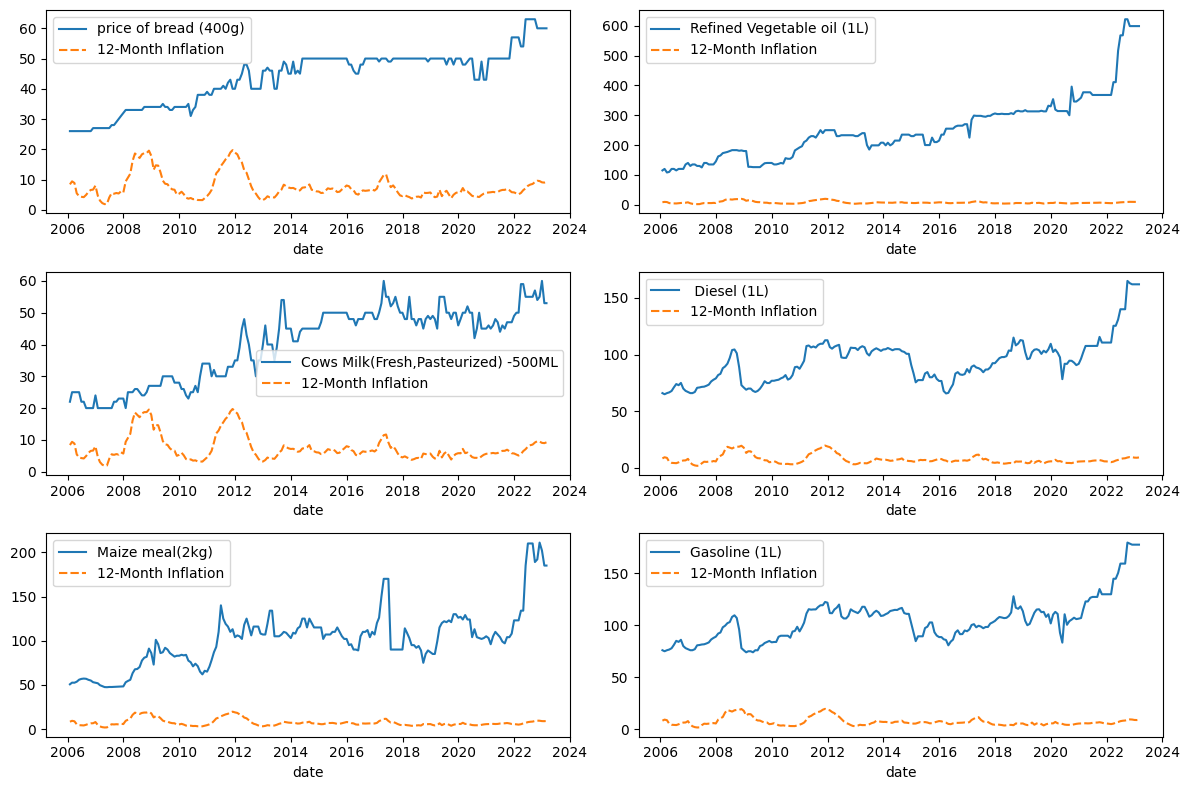

In [71]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['price of bread (400g)', '12-Month Inflation']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Refined Vegetable oil (1L)', '12-Month Inflation']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Cows Milk(Fresh,Pasteurized) -500ML', '12-Month Inflation']], ax=axs[1,0])
sns.lineplot(data=time_series_data[[' Diesel (1L)', '12-Month Inflation']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal(2kg)', '12-Month Inflation']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', '12-Month Inflation']], ax=axs[2,1])
plt.tight_layout()
plt.show()

Price of bread and 12-month inflation:
1.The graph shows the trend of the price of bread (400g) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of bread has generally been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the bread price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

2.Refined vegetable oil and 12-month inflation:
This graph shows the trend of the price of refined vegetable oil (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of refined vegetable oil has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the refined vegetable oil price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

3.Cow's milk (fresh, pasteurized) and 12-month inflation:
The graph shows the trend of the price of fresh, pasteurized cow's milk (500mL) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of fresh, pasteurized cow's milk has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the cow's milk price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

4.Diesel and 12-month inflation:
This graph shows the trend of the price of diesel (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of diesel has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the diesel price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

5.Maize meal and 12-month inflation:
This graph shows the trend of the price of maize meal (2kg) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of maize meal has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the maize meal price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

6.Gasoline and 12-month inflation:This graph shows the trend of the price of gasoline (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of gasoline has been fluctuating over time, with occasional dips and peaks, while the inflation rate has been fluctuating around a relatively constant rate. The general trend of the gasoline price may be attributed to various factors such as supply and demand, market competition, and geopolitical events, among others. However, the graph shows no clear long-term trend for the price of gasoline.

#### Commodity Prices and Exchange Rate over Time

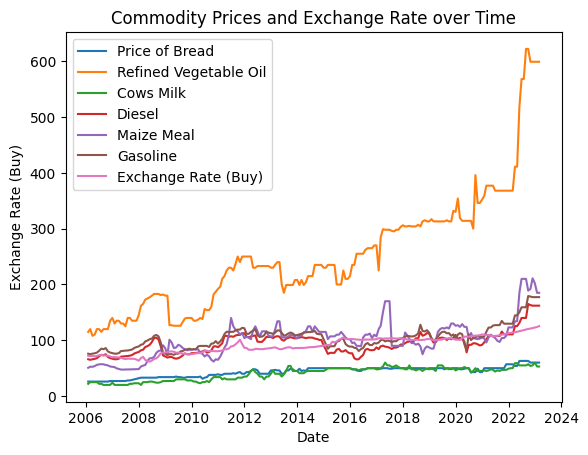

In [72]:
plt.plot(time_series_data.index, time_series_data['price of bread (400g)'], label='Price of Bread')
plt.plot(time_series_data.index, time_series_data['Refined Vegetable oil (1L)'], label='Refined Vegetable Oil')
plt.plot(time_series_data.index, time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'], label='Cows Milk')
plt.plot(time_series_data.index, time_series_data[' Diesel (1L)'], label='Diesel')
plt.plot(time_series_data.index, time_series_data['Maize meal(2kg)'], label='Maize Meal')
plt.plot(time_series_data.index, time_series_data['Gasoline (1L)'], label='Gasoline')
plt.plot(time_series_data.index, time_series_data['Buy'], label='Exchange Rate (Buy)')

plt.xlabel('Date')
plt.ylabel('Exchange Rate (Buy)')
plt.title('Commodity Prices and Exchange Rate over Time')
plt.legend()

plt.show()


The graph above shows the trend in commodity prices and exchange rate (buy) over time. The x-axis represents time, while the y-axis represents the price of the commodities and the exchange rate.

There are seven lines on the graph, each representing the price of a different commodity or the exchange rate. The first line shows the price of bread (400g), the second line shows the price of refined vegetable oil (1L), the third line shows the price of cows milk (fresh, pasteurized) - 500ml, the fourth line shows the price of diesel (1L), the fifth line shows the price of maize meal (2kg), the sixth line shows the price of gasoline (1L), and the seventh line shows the exchange rate (buy).

Looking at the graph, we can see that there are fluctuations in the prices of the commodities and exchange rate over time. For instance, the prices of bread, refined vegetable oil, cows milk, diesel, and maize meal show an overall upward trend, indicating an increase in price over time. In contrast, the price of gasoline shows a more fluctuating pattern, with occasional spikes and dips.

Moreover, we can see that there is a negative correlation between the exchange rate and the prices of the commodities. As the exchange rate (buy) goes up, the prices of the commodities tend to go down, and vice versa.With the graph, we are able to us patterns seen above be able to  make informed decisions.

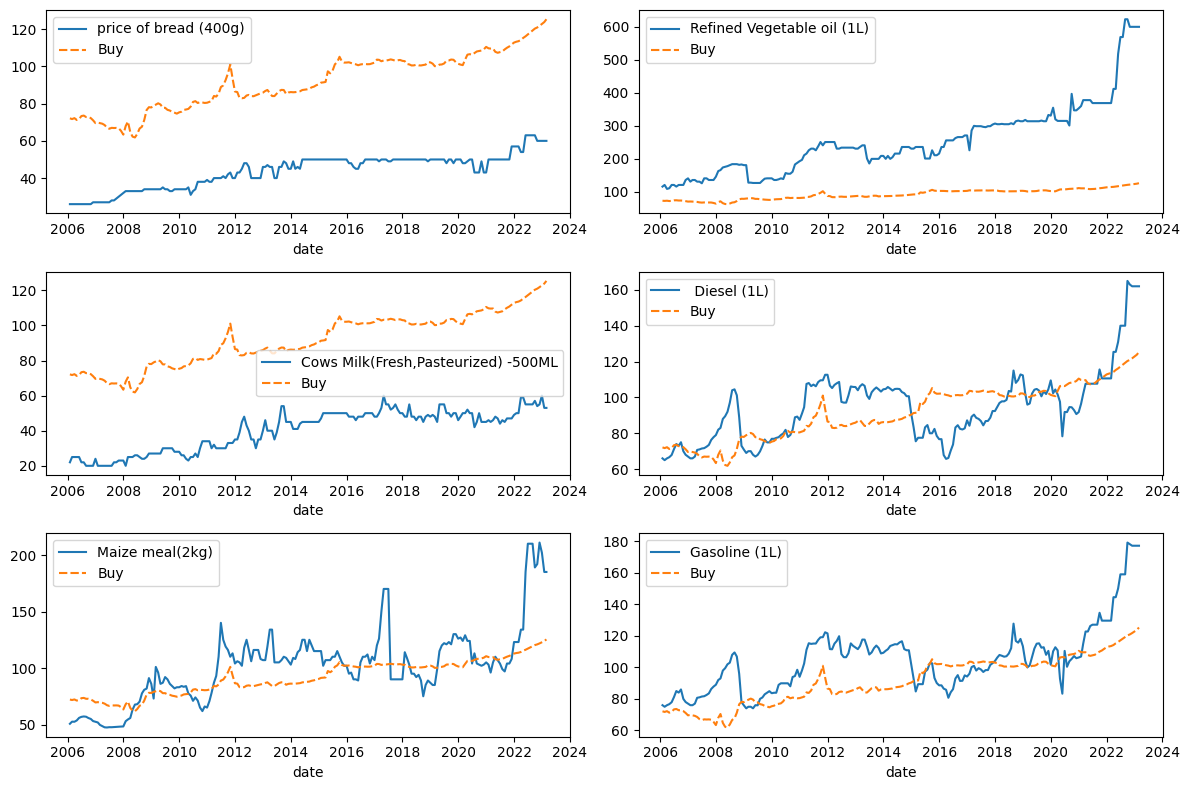

In [73]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['price of bread (400g)', 'Buy']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Refined Vegetable oil (1L)', 'Buy']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Cows Milk(Fresh,Pasteurized) -500ML', 'Buy']], ax=axs[1,0])
sns.lineplot(data=time_series_data[[' Diesel (1L)', 'Buy']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal(2kg)', 'Buy']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Buy']], ax=axs[2,1])
plt.tight_layout()
plt.show()

The graph above shows the time series data of six commodities and the exchange rate (buy) over time. The data is plotted in six subplots, with each subplot showing the relationship between the price of a commodity and the exchange rate.

In the first subplot (top-left), the price of bread (400g) and the exchange rate are plotted against time. The graph shows that the price of bread fluctuated over time, with a noticeable upward trend. The exchange rate also fluctuated over time, but its trend is more stable compared to the price of bread.

In the second subplot (top-right), the price of Refined Vegetable oil (1L) and the exchange rate are plotted against time. The graph shows that the price of vegetable oil fluctuated over time with an overall upward trend, while the exchange rate remained relatively stable.

In the third subplot (middle-left), the price of Cows Milk(Fresh,Pasteurized) -500ML and the exchange rate are plotted against time. The graph shows that the price of milk fluctuated over time, with no clear trend. The exchange rate also fluctuated over time, with a slight upward trend.

In the fourth subplot (middle-right), the price of Diesel (1L) and the exchange rate are plotted against time. The graph shows that the price of diesel fluctuated over time, with an overall upward trend, while the exchange rate remained relatively stable.

In the fifth subplot (bottom-left), the price of Maize meal(2kg) and the exchange rate are plotted against time. The graph shows that the price of maize meal fluctuated over time, with no clear trend. The exchange rate also fluctuated over time, with a slight upward trend.

In the last subplot (bottom-right), the price of Gasoline (1L) and the exchange rate are plotted against time. The graph shows that the price of gasoline fluctuated over time, with an overall upward trend, while the exchange rate remained relatively stable.

In summary, the graph shows that the relationship between commodity prices and the exchange rate is complex and varies depending on the commodity. Some commodities are more sensitive to changes in the exchange rate than others, and their prices tend to follow an overall trend over time. However, other commodities' prices are more volatile, and their prices fluctuate more randomly over time

#### Commodity Prices and Exchange Rate and Inflation over time

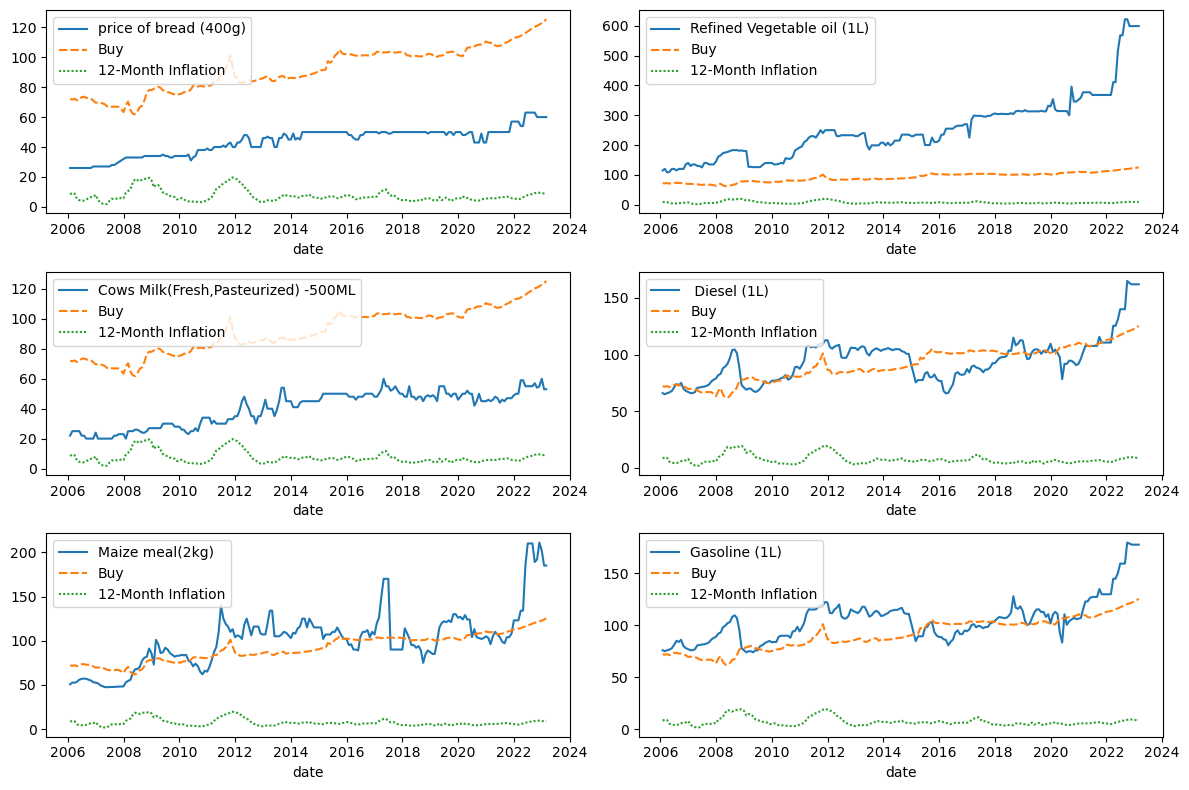

In [71]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['price of bread (400g)', 'Buy','12-Month Inflation']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Refined Vegetable oil (1L)', 'Buy', '12-Month Inflation']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Cows Milk(Fresh,Pasteurized) -500ML', 'Buy', '12-Month Inflation']], ax=axs[1,0])
sns.lineplot(data=time_series_data[[' Diesel (1L)', 'Buy', '12-Month Inflation']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal(2kg)', 'Buy', '12-Month Inflation']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Buy', '12-Month Inflation']], ax=axs[2,1])
plt.tight_layout()
plt.show()

The graph provides an insight into the relationship between commodity prices, exchange rate, and inflation over time. Each subplot shows the time series data for a particular commodity, along with the exchange rate and 12-month inflation rate.

From the graph, we can see that the prices of all commodities are affected by changes in the exchange rate and inflation rate, but to varying degrees. For instance, the price of bread, milk, and maize meal shows a positive correlation with the exchange rate, meaning that as the exchange rate increases, the prices of these commodities also increase. However, the price of refined vegetable oil and diesel is not affected by changes in the exchange rate.

Furthermore, we can see that all commodities are affected by inflation, but some commodities are more sensitive to inflation than others. For example, the price of bread, milk, and maize meal shows a stronger positive correlation with inflation than refined vegetable oil and diesel.

Overall, these graphs suggest that the exchange rate has a more significant impact on some commodity prices than others, and that the relationship between commodity prices, exchange rates, and inflation rates can be complex and vary over time.

The graphs above provide insights into the relationship between commodity prices, exchange rates, and inflation over time. Each graph shows the price of a specific commodity, the exchange rate, and the 12-month inflation rate.

The first graph shows the price of bread, exchange rate, and inflation rate over time. It shows that the price of bread and exchange rate have a positive correlation, as the exchange rate increases, the price of bread also tends to increase. However, the inflation rate has a more complex relationship with the price of bread and exchange rate, as it appears to fluctuate more randomly.

The second graph shows the price of refined vegetable oil, exchange rate, and inflation rate over time. Similar to the first graph, the price of vegetable oil and exchange rate have a positive correlation. The inflation rate also appears to have a positive correlation with the price of vegetable oil, as the inflation rate increases, the price of vegetable oil tends to increase as well.

The third graph shows the price of fresh, pasteurized cow's milk, exchange rate, and inflation rate over time. The graph suggests that there is a negative correlation between the price of milk and the exchange rate, meaning that as the exchange rate increases, the price of milk tends to decrease. However, the inflation rate also has a positive correlation with the price of milk, as the inflation rate increases, the price of milk tends to increase as well.

The fourth graph shows the price of diesel, exchange rate, and inflation rate over time. It suggests that the price of diesel and exchange rate have a positive correlation. However, the inflation rate appears to have a weaker correlation with the price of diesel and exchange rate, as it tends to fluctuate more randomly.

The fifth graph shows the price of maize meal, exchange rate, and inflation rate over time. The graph suggests that there is a positive correlation between the price of maize meal and the exchange rate, as the exchange rate increases, the price of maize meal also tends to increase. The inflation rate also appears to have a positive correlation with the price of maize meal.

The sixth graph shows the price of gasoline, exchange rate, and inflation rate over time. Similar to the fourth graph, the price of gasoline and exchange rate have a positive correlation. However, the inflation rate appears to have a weaker correlation with the price of gasoline and exchange rate, as it tends to fluctuate more randomly.

Overall, these graphs suggest that the exchange rate has a more significant impact on some commodity prices than others, and that the relationship between commodity prices, exchange rates, and inflation rates can be complex and vary over time.

Above is a representation of how various commodities behaved ever the years. Major points of interest are as follows:
1. First its important ot note that this commodities are affected by both what is happening in and around the country.
2. During our Country's election period (years 2008,2012,2017) the general atmosphere was very volatile and this lead to the prices of commodites to spike as most people were panic buying.
3. Our Country heavily relies on imports for sustance so it is therefore reasonable to conclude that the small spikes we see through out the years is caused by factors affecting the Countries in question.
4. Another important thing to note is that for all commodities the price has generally been increasing through out the years. For commodities like Cow's milk,Bread,Maize,and Refined Vegetable Oil the main contributing factor to this increase is Global warming.For Gasoline and Diesel the main cotributing factor is the civil unrest and political instability in the oil producing countries.

In [82]:
time_series_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),12-Month Inflation,Buy
date,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,8.39,72.114819
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.39,71.712730
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.85,72.205787
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,5.44,71.231894
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,4.47,71.683132


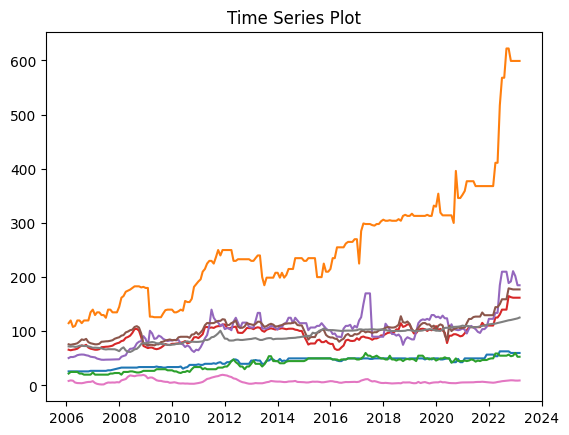

In [83]:
# Plot the data
plt.plot(time_series_data)
plt.title('Time Series Plot')
plt.show()

Looking at the plot, we can see that the variables have different patterns over time. For example, the price of bread (in red) starts at around 26 in 2006 and steadily increases until it reaches around 60 in 2023. The price of refined vegetable oil (in blue) shows a similar pattern, but with more fluctuations over time. On the other hand, the inflation rate (in orange) shows a more erratic pattern with a lot of ups and downs.

We can also see that some variables have higher values than others. For example, the price of cows milk (in green) is much lower than the price of refined vegetable oil and diesel (in blue and purple, respectively).

#### Correlation Matrix

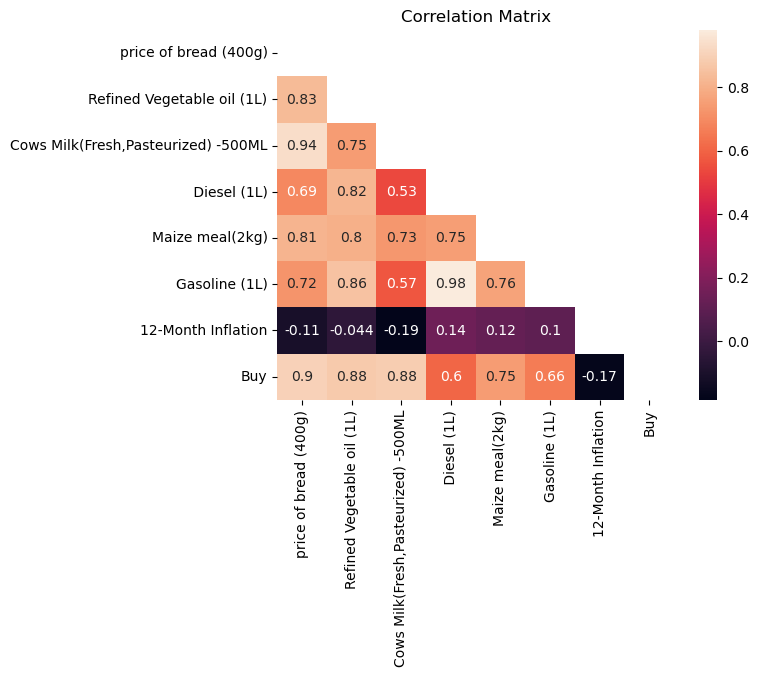

In [73]:
# create a correlation matrix
corr = time_series_data.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()

## 5. Modeling

### Checking For Stationarity

In [74]:
# Check for stationarity using Augmented Dickey-Fuller (ADF) test
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
        
adf_test(time_series_data['price of bread (400g)'])
adf_test(time_series_data['Refined Vegetable oil (1L)'])
adf_test(time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'])
adf_test(time_series_data[' Diesel (1L)'])
adf_test(time_series_data['Maize meal(2kg)'])
adf_test(time_series_data['Gasoline (1L)'])

ADF Statistic: -1.1278551865585613
p-value: 0.7038367344234686
Critical Values:
1%: -3.4648754262570978
5%: -2.876714157488788
10%: -2.574858699001736
ADF Statistic: 1.0577629903644143
p-value: 0.9948395263451192
Critical Values:
1%: -3.4626576734812318
5%: -2.8757444215841326
10%: -2.5743412314098753
ADF Statistic: -1.1859366933525173
p-value: 0.6796159462768698
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
ADF Statistic: -0.4852759101706022
p-value: 0.8948579178769456
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
ADF Statistic: -2.0463553766296836
p-value: 0.2666247681230636
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
ADF Statistic: -0.15788856274327678
p-value: 0.9433585619537145
Critical Values:
1%: -3.4626576734812318
5%: -2.8757444215841326
10%: -2.5743412314098753


The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series is non-stationary (has a unit root) and the alternative hypothesis is that it is stationary.

In each case, the ADF statistic is provided, along with the p-value and the critical values at the 1%, 5%, and 10% levels. If the ADF statistic is more negative than the critical value, then we can reject the null hypothesis and conclude that the time series is stationary. Conversely, if the ADF statistic is less negative than the critical value, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

Based on these results, we can see that in most cases, we fail to reject the null hypothesis, indicating that the time series are likely non-stationary. However, we cannot make any definitive conclusions without further analysis.

In [75]:
# Create a dictionary to hold the ADF test results
results = {}

# Loop through each column in the dataframe and perform ADF test
for column in time_series_data.columns:
    result = adfuller(time_series_data[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

                                        Stationary?
price of bread (400g)                not stationary
Refined Vegetable oil (1L)           not stationary
Cows Milk(Fresh,Pasteurized) -500ML  not stationary
 Diesel (1L)                         not stationary
Maize meal(2kg)                      not stationary
Gasoline (1L)                        not stationary
12-Month Inflation                       stationary
Buy                                  not stationary


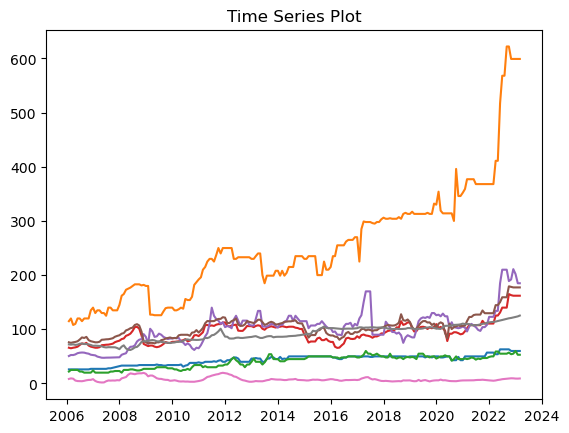

In [76]:
# Plot the data
plt.plot(time_series_data)
plt.title('Time Series Plot')
plt.show()

### Differencing to achieve stationarity

In [77]:
# Take first difference of the non-stationary columns
time_series_data_diff = time_series_data[['price of bread (400g)', 'Refined Vegetable oil (1L)', 'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)', 'Maize meal(2kg)', 'Gasoline (1L)', 'Buy', '12-Month Inflation']].diff().dropna()

# Update the results dictionary with the ADF test results for the differenced columns
for column in time_series_data_diff.columns:
    result = adfuller(time_series_data_diff[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the updated dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

                                    Stationary?
price of bread (400g)                stationary
Refined Vegetable oil (1L)           stationary
Cows Milk(Fresh,Pasteurized) -500ML  stationary
 Diesel (1L)                         stationary
Maize meal(2kg)                      stationary
Gasoline (1L)                        stationary
12-Month Inflation                   stationary
Buy                                  stationary


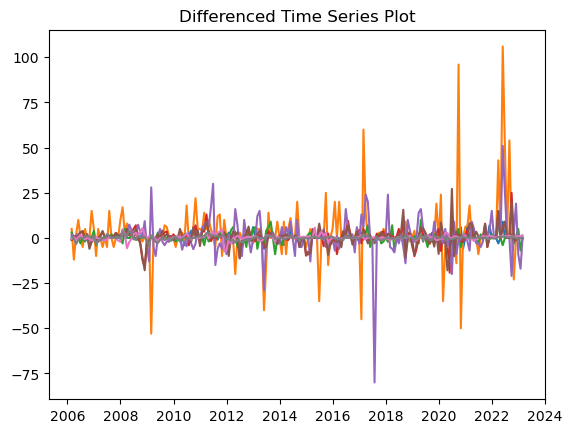

In [78]:
# Plot the data
plt.plot(time_series_data_diff)
plt.title('Differenced Time Series Plot')
plt.show()

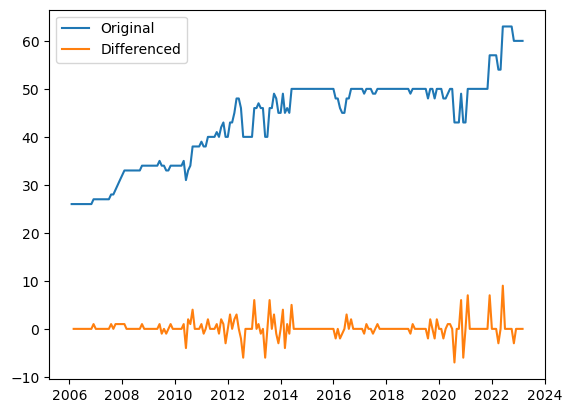

In [79]:
plt.plot(time_series_data['price of bread (400g)'])
plt.plot(time_series_data_diff['price of bread (400g)'])
plt.legend(['Original', 'Differenced'])
plt.show()

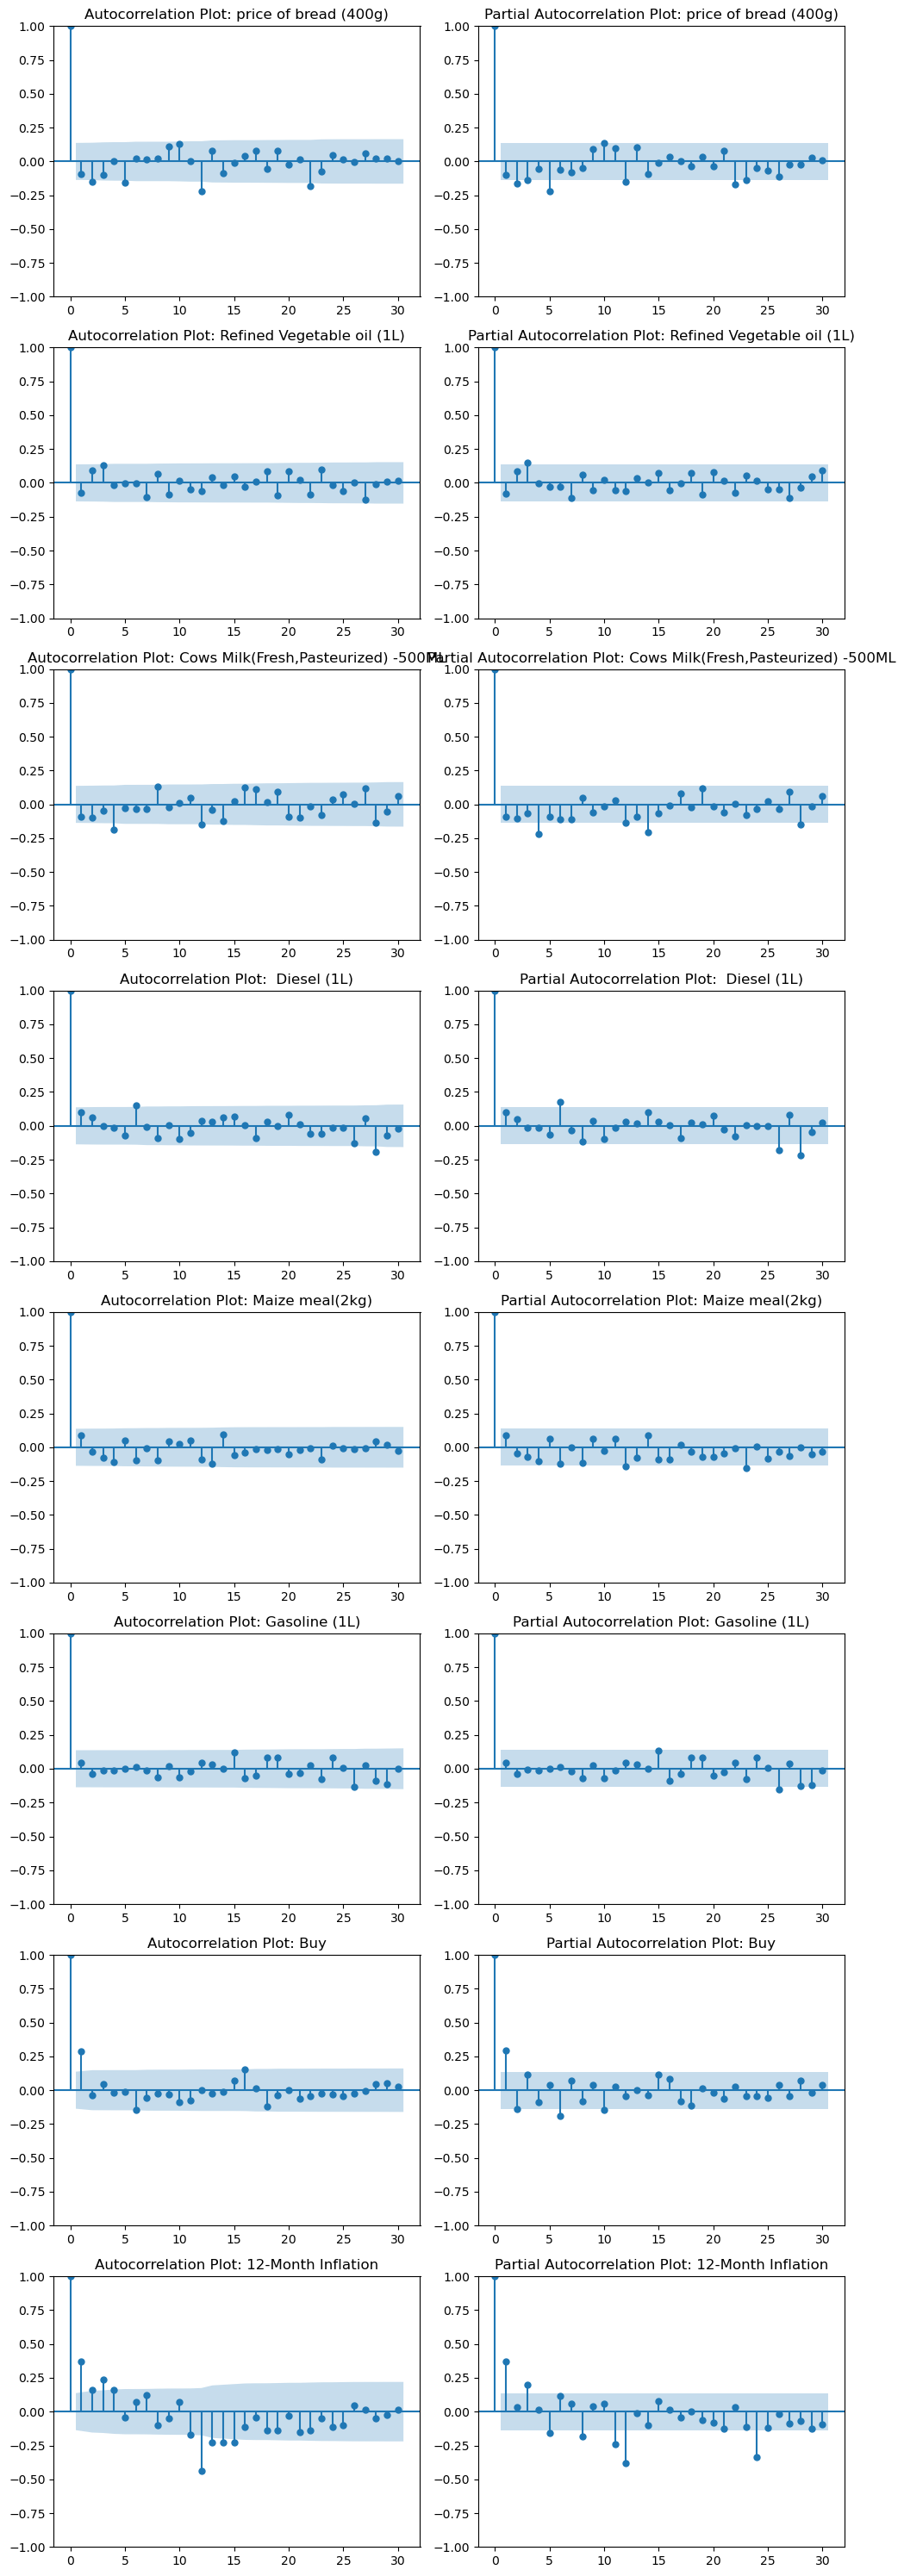

In [80]:
# Plot ACF and PACF for each column
fig, axes = plt.subplots(nrows=len(time_series_data_diff.columns), ncols=2, figsize=(10, 30))
for i, column in enumerate(time_series_data_diff.columns):
    plot_acf(time_series_data_diff[column], ax=axes[i][0], lags=30)
    axes[i][0].set_title(f'Autocorrelation Plot: {column}')
    plot_pacf(time_series_data_diff[column], ax=axes[i][1], lags=30)
    axes[i][1].set_title(f'Partial Autocorrelation Plot: {column}')
plt.tight_layout()
plt.show()

### Model Selection

In [81]:
# Split the data into train and test sets
train_data = time_series_data_diff[:'2022-09-01']
test_data = time_series_data_diff['2022-09-01':]

### Model 1: SARIMA model

In [82]:
# Define a dictionary to store the RMSE values for each model
rmse_dict = {'SARIMA': [], 'SES': [], 'HWES': [], 'ARIMA': []}

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Iterate through each column and fit a SARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SARIMA model
    model = SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

RMSE for price of bread (400g): 1.9622814222399387
RMSE for Refined Vegetable oil (1L): 33.36490654054155
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.630707923566939
RMSE for  Diesel (1L): 9.911460755225052
RMSE for Maize meal(2kg): 13.878482680225169
RMSE for Gasoline (1L): 8.383976572406517
RMSE for Buy: 0.9213168858962176
RMSE for 12-Month Inflation: 0.36978316014009693


### Model 2: Simple Exponential Smoothing

In [84]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Iterate through each column and fit an SES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SES model
    model = SimpleExpSmoothing(endog)
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

RMSE for price of bread (400g): 1.3116781244225155
RMSE for Refined Vegetable oil (1L): 17.192531941707507
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.8476900517786783
RMSE for  Diesel (1L): 10.11983104633717
RMSE for Maize meal(2kg): 14.288380751386294
RMSE for Gasoline (1L): 8.1147031247686
RMSE for Buy: 0.8092839004930007
RMSE for 12-Month Inflation: 0.4553944825952488


### Model 3: Holt-Winters Exponential Smoothing (HWES)

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing

# Iterate through each column and fit an HWES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the HWES model
    model = ExponentialSmoothing(endog, seasonal_periods=12, trend='add', seasonal='add')
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['HWES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


RMSE for price of bread (400g): 1.4683786947359614
RMSE for Refined Vegetable oil (1L): 12.425003528736147
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.6111269266328967
RMSE for  Diesel (1L): 9.769505312367828
RMSE for Maize meal(2kg): 14.214749685165414
RMSE for Gasoline (1L): 7.994059842815829
RMSE for Buy: 0.9414019467970235
RMSE for 12-Month Inflation: 0.45961519499739484


### Model 4: Arima Model

In [86]:
# Iterate through each column and fit an ARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the ARIMA model
    model = ARIMA(endog, order=(1,1,1))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['ARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


RMSE for price of bread (400g): 1.311532745821097
RMSE for Refined Vegetable oil (1L): 30.03783664358704
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.8466328440732234
RMSE for  Diesel (1L): 10.141644670829374
RMSE for Maize meal(2kg): 14.26921604554667
RMSE for Gasoline (1L): 8.124814291146016
RMSE for Buy: 0.7660634276759561
RMSE for 12-Month Inflation: 0.3491979778513782


### Models Comparison

In [87]:
# Create a DataFrame to compare the RMSE values
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=time_series_data_diff.columns)
transposed_df = rmse_df.transpose()
print(transposed_df)

                                        SARIMA        SES       HWES  \
price of bread (400g)                 1.962281   1.311678   1.468379   
Refined Vegetable oil (1L)           33.364907  17.192532  12.425004   
Cows Milk(Fresh,Pasteurized) -500ML   3.630708   3.847690   3.611127   
 Diesel (1L)                          9.911461  10.119831   9.769505   
Maize meal(2kg)                      13.878483  14.288381  14.214750   
Gasoline (1L)                         8.383977   8.114703   7.994060   
Buy                                   0.921317   0.809284   0.941402   
12-Month Inflation                    0.369783   0.455394   0.459615   

                                         ARIMA  
price of bread (400g)                 1.311533  
Refined Vegetable oil (1L)           30.037837  
Cows Milk(Fresh,Pasteurized) -500ML   3.846633  
 Diesel (1L)                         10.141645  
Maize meal(2kg)                      14.269216  
Gasoline (1L)                         8.124814  
Buy     

In [88]:
best_models = transposed_df.idxmin(axis=1)
print(best_models)

price of bread (400g)                   ARIMA
Refined Vegetable oil (1L)               HWES
Cows Milk(Fresh,Pasteurized) -500ML      HWES
 Diesel (1L)                             HWES
Maize meal(2kg)                        SARIMA
Gasoline (1L)                            HWES
Buy                                     ARIMA
12-Month Inflation                      ARIMA
dtype: object


### Model Fitting

In [89]:
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
#train_data = time_series_data.iloc[:int(len(time_series_data)*0.8)]
#test_data = time_series_data.iloc[int(len(time_series_data)*0.8):]

# Fit the best model for each time series using the entire training set
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(train_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(train_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(train_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(train_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Make predictions on the testing set
    predictions = fitted_model.forecast(len(test_data))

    # Compare the predicted values with the actual values to evaluate model performance
    rmse = np.sqrt(mean_squared_error(test_data[col], predictions))
    print(f"{col}: {model_name} RMSE = {rmse}")


price of bread (400g): ARIMA RMSE = 1.224744871391589
Refined Vegetable oil (1L): HWES RMSE = 12.425003528736147
Cows Milk(Fresh,Pasteurized) -500ML: HWES RMSE = 3.6111269266328967
 Diesel (1L): HWES RMSE = 9.769505312367828
Maize meal(2kg): SARIMA RMSE = 13.65598984345174
Gasoline (1L): HWES RMSE = 7.994059842815829
Buy: ARIMA RMSE = 0.29048715660300267
12-Month Inflation: ARIMA RMSE = 0.38282379935270244


### Model Evaluation

In [90]:
# Create an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame()

# Fit the best model for each time series using the entire dataset
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(time_series_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(time_series_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(time_series_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(time_series_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Forecast future values
    forecast = fitted_model.forecast(steps=12)

    # Store the forecasted values in the DataFrame
    forecast_df[col] = forecast

# Set the index of the DataFrame to be the forecasted dates
forecast_df.index = pd.date_range(start='2023-03-31', periods=12, freq='M')

# Print the DataFrame
print(forecast_df)


            price of bread (400g)  Refined Vegetable oil (1L)  \
2023-03-31                   60.0                  603.366326   
2023-04-30                   60.0                  603.216755   
2023-05-31                   60.0                  608.750532   
2023-06-30                   60.0                  609.309167   
2023-07-31                   60.0                  611.016095   
2023-08-31                   60.0                  616.119488   
2023-09-30                   60.0                  625.042101   
2023-10-31                   60.0                  620.623810   
2023-11-30                   60.0                  624.684642   
2023-12-31                   60.0                  626.029372   
2024-01-31                   60.0                  626.321065   
2024-02-29                   60.0                  628.277261   

            Cows Milk(Fresh,Pasteurized) -500ML   Diesel (1L)  \
2023-03-31                            54.508951    164.506629   
2023-04-30              

### New Arima

In [91]:
import itertools

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Define an empty dictionary to store the RMSE values for each commodity
rmse_dict = {col: [] for col in ['price of bread (400g)', 'Refined Vegetable oil (1L)', 'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)', 'Maize meal(2kg)', 'Gasoline (1L)']}

# Iterate over each commodity and fit an ARIMA model
for col in rmse_dict.keys():
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Find the exogenous variables
    exog = train_data[['12-Month Inflation', 'Buy']]

    # Find the best (p, d, q) values for the ARIMA model
    rmse_values = []
    for pdq in pdq_values:
        # Fit ARIMA model
        model = ARIMA(endog, order=pdq, exog=exog)
        model_fit = model.fit()

        # Make predictions
        arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=test_data[['12-Month Inflation', 'Buy']])

        # Calculate RMSE
        arima_rmse = np.sqrt(np.mean((arima_predictions - test_data[col])**2))

        # Store the RMSE value
        rmse_values.append(arima_rmse)

    # Find the combination of p, d, and q that gives the lowest RMSE
    best_pdq = pdq_values[np.argmin(rmse_values)]

    # Fit ARIMA model with the best combination of p, d, and q
    model = ARIMA(endog, order=best_pdq, exog=exog)
    model_fit = model.fit()

    # Make predictions with the best model
    arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=test_data[['12-Month Inflation', 'Buy']])

    # Calculate RMSE with the best model
    arima_rmse = np.sqrt(np.mean((arima_predictions - test_data[col])**2))

    # Store the RMSE value in the dictionary
    rmse_dict[col].append(arima_rmse)

    print('Best (p, d, q) values for {}:'.format(col), best_pdq)
    print('ARIMA RMSE for {}:'.format(col), arima_rmse)


Best (p, d, q) values for price of bread (400g): (1, 0, 1)
ARIMA RMSE for price of bread (400g): 1.1710951392945639
Best (p, d, q) values for Refined Vegetable oil (1L): (0, 0, 1)
ARIMA RMSE for Refined Vegetable oil (1L): 10.868352503967325
Best (p, d, q) values for Cows Milk(Fresh,Pasteurized) -500ML: (1, 1, 0)
ARIMA RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.8377435541808915
Best (p, d, q) values for  Diesel (1L): (2, 1, 0)
ARIMA RMSE for  Diesel (1L): 9.488708516953531
Best (p, d, q) values for Maize meal(2kg): (2, 0, 2)
ARIMA RMSE for Maize meal(2kg): 13.455982233958766
Best (p, d, q) values for Gasoline (1L): (2, 1, 0)
ARIMA RMSE for Gasoline (1L): 7.281894912317086


### VAR Model

In [92]:
test_obs = 12
train = time_series_data[:-test_obs]
test = time_series_data[-test_obs:]

In [93]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [94]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  18.34111036289007
BIC:  19.55827975978723

Order = 2
AIC:  18.358564730276665
BIC:  20.66595728546301

Order = 3
AIC:  18.47540442583107
BIC:  21.88092634001602

Order = 4
AIC:  18.581189617467842
BIC:  23.092844117732938

Order = 5
AIC:  18.80716673170964
BIC:  24.433055731389864

Order = 6
AIC:  18.986792934567518
BIC:  25.735118729404434

Order = 7
AIC:  19.205509306555896
BIC:  27.084576308083662

Order = 8
AIC:  19.3977526921213
BIC:  28.41596919927649

Order = 9
AIC:  19.544408882663433
BIC:  29.710288892640413

Order = 10
AIC:  19.632077783493326
BIC:  30.954242842898886



In [95]:
result = model.fit(1)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Apr, 2023
Time:                     18:09:27
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    19.5583
Nobs:                     193.000    HQIC:                   18.8340
Log likelihood:          -3888.76    FPE:                9.24013e+07
AIC:                      18.3411    Det(Omega_mle):     6.41691e+07
--------------------------------------------------------------------
Results for equation price of bread (400g)
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                         -0.453909         1.844391           -0.246           0.806
L1.price of bread (400g)                       0.7

In [96]:
lagged_Values = time_series_data.values[-8:]
pred = result.forecast(y=lagged_Values, steps=12) 

lagged_Values = time_series_data.values[-8:]
pred = result.forecast(y=lagged_Values, steps=12) 

idx = pd.date_range('2023-03-31', periods=12, freq='MS')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=['price of bread (400g)', 'Refined Vegetable oil (1L)', 'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)', 'Maize meal(2kg)', 'Gasoline (1L)', '12-Month Inflation', 'Buy'])
print(df_forecast)

            price of bread (400g)  Refined Vegetable oil (1L)  \
2023-04-01              60.833058                  584.796841   
2023-05-01              61.707095                  574.616695   
2023-06-01              62.587943                  567.145502   
2023-07-01              63.448133                  561.487989   
2023-08-01              64.268187                  557.036308   
2023-09-01              65.035688                  553.380691   
2023-10-01              65.743745                  550.247998   
2023-11-01              66.389517                  547.459120   
2023-12-01              66.972987                  544.899338   
2024-01-01              67.496022                  542.497674   
2024-02-01              67.961676                  540.212504   
2024-03-01              68.373706                  538.021577   

            Cows Milk(Fresh,Pasteurized) -500ML   Diesel (1L)  \
2023-04-01                            53.855673    162.501443   
2023-05-01              